In [1]:
from gather_analysis_helper import *
import sys, os, io, random, json, re, time
import pandas as pd
from collections import Counter
from time_helpers import *

%matplotlib inline

In [2]:
timeframe = 24 * 60 * 60
end_time = unix_time_to_readable(get_utc_unix_time())
start_time = unix_time_to_readable(get_utc_unix_time() - timeframe)
raw_data = read_from_raw_data(start_time, end_time)

Reading data from: 2018-12-04 14:24:33 to: 2018-12-05 14:24:33
Count: 50000
Count: 100000
Count: 150000
Count: 200000
Count: 250000
Count: 300000
Count: 350000
Count: 400000
Count: 450000
Count: 500000
Count: 550000
Count: 600000
Count: 650000
Count: 700000
Count: 750000
Saw a total of 757000 records.
463926 records matched the date range.


In [3]:
print(json.dumps(raw_data[0], indent=4))

{
    "lang": "en",
    "quote_count": 0,
    "retweeted_status": {
        "lang": "en",
        "quote_count": 0,
        "source": "<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>",
        "text": "@SocialM85897394 Theresa May says that immigration was a main driver for Brexit &amp; she sees it as her duty to implem\u2026 https://t.co/Y7bsdBwaS4",
        "created_at": "Tue Dec 04 14:03:29 +0000 2018",
        "is_quote_status": false,
        "in_reply_to_status_id": 1069653719380357121,
        "reply_count": 1,
        "in_reply_to_screen_name": "SocialM85897394",
        "id_str": "1069955352505053184",
        "retweet_count": 5,
        "favorite_count": 6,
        "user": {
            "default_profile": true,
            "statuses_count": 4065,
            "description": "Before anyone asks I voted to leave the SM, CU, FOM, ECJ control and I knew what I was voting for.\nI normally follow back.",
            "verified": false,
            "followers_co

In [4]:
print("Getting counters and interactions...")
user_fields, counters, interactions = get_counters_and_interactions(raw_data)
list_len = 50
counter_names = [x for x, y in counters.items()]
for n in counter_names:
    print("")
    print(n)
    print("---------")
    if n in user_fields:
        print_sn_counter(counters[n], list_len)
    elif n == "hashtags":
        print_hashtag_counter(counters[n], list_len)
    else:
        print_counter(counters[n], list_len)
save_csv(interactions, "data/interactions.csv")

Getting counters and interactions...
Processed 0 tweets.
Found 146862 users.
Found 7422 hashtags.
Found 14524 urls.
Found 146862 amplifiers.
Found 36778 influencers.

users
---------
353	https://twitter.com/FAO_Scotbot
306	https://twitter.com/EuEthnic
269	https://twitter.com/MexicoRS78
262	https://twitter.com/GreenOakFraming
262	https://twitter.com/DavidLance3
260	https://twitter.com/tvThirdEyeB
247	https://twitter.com/tobytortoise1
245	https://twitter.com/curiocat13
238	https://twitter.com/Kilsally
232	https://twitter.com/SandraDunn1955
231	https://twitter.com/fiona_fionnagal
227	https://twitter.com/SpanishDan1
218	https://twitter.com/Doozy_45
212	https://twitter.com/Ryan_HFW
194	https://twitter.com/Shambles151
194	https://twitter.com/cloudwanderer3
191	https://twitter.com/jagxjr40
188	https://twitter.com/SE25A
187	https://twitter.com/IsThisAB0t
187	https://twitter.com/londonyc
186	https://twitter.com/GillGSco4Ever
185	https://twitter.com/SerendipitySays
185	https://twitter.com/Keithb

183220	brexit
51287	deal
47836	#brexit
39738	government
38530	parliament
36968	may
33389	uk
33180	theresa
31387	mps
30151	vote
26675	eu
23818	legal
21790	contempt
21052	advice
19789	debate
19340	people
18148	says
17302	would
15514	may's
14406	one
14083	voted
13136	us
12933	right
12926	leave
12736	bbc
12621	get
12187	found
12021	british
11821	referendum
11446	back
11415	time
11105	like
10928	amendment
10913	could
10900	think
10557	corbyn
10504	country
10084	may’s
10056	want
9987	it’s
9846	day
9844	commons
9534	general
9478	control
9164	grieve
9101	brexit,
8975	tory
8928	stop
8903	today
8883	de

urls
---------
1649	http://www.politics.co.uk/blogs/2018/12/04/may-crushed-as-parliament-humbles-her-before-brexit-vote
1112	https://www.telegraph.co.uk/politics/2018/12/04/heavy-heart-leaving-ukip-not-brexit-party-nation-badly-needs/
1038	https://www.bloomberg.com/opinion/articles/2018-12-04/mervyn-king-says-may-s-brexit-deal-is-a-betrayal
1037	https://bbc.in/2EdpgPQ
695	https://blogs.spectator.

In [5]:
print("Trimming graph")
trimmed_graph = trim_graph(interactions, counters["users"], 10)
print("Saving csv")
save_csv(trimmed_graph, "data/trimmed_graph.csv")
print("Done")

Trimming graph
All users: 146862
Trimmed users: 7647
Saving csv
Done


In [16]:
magas = match_descriptions(raw_data, ["maga"])["maga"]
print("Found " + str(len(magas)) + " magas.")
save_json("data/magas.json", magas)

Found 3188 magas.


In [17]:
maga_tweet_count = 0
for m in magas:
    if m in counters["users"]:
        maga_tweet_count += counters["users"][m]
print("Maga tweets: " + str(maga_tweet_count))

Maga tweets: 6202


In [22]:
t = get_unique_tweets_from_snlist(raw_data, magas)
print(len(t))

2020


In [23]:
print_counter(t, 50)

579	RT @sxdoc: Theresa May Caught In Massive Lie; Her #BREXIT Plan Leaves EU in Control. She Has No Guts To Really Leave EU. She Is Selling Bri…
380	RT @LVNancy: France has suspended the gas tax
but #FranceProtests aren't about a gas tax.
it’s revolt against Globalism.

Just look at #BRE…
362	RT @5Strat: Where we stand tonight:

France - Macron is seriously considering resigning.
Belgium - Mass Riots in Brussels
Holland - Mass Ri…
289	RT @Nigel_Farage: There is a huge divide right across the West. For 20 years, the gap between rich and poor widened as global elites ignore…
121	RT @JuliaHB1: I am so beyond angry with MPs tonight. 

The entire bloody reason why voters demanded a referendum on Brexit was because MPs…
97	RT @BreakingNLive: BREAKING NEWS: PM Theresa May’s Government becomes the first in history to be found in contempt of Parliament for not pu…
93	RT @TheGreatFeather: As an American, I do not understand this historical move but it is a first and worth the RT! Holding an enti

In [18]:
maga_retweets = get_retweets_from_sn_list(raw_data, magas)
print(len(maga_retweets))
save_json("data/maga_retweets.json", maga_retweets)
print("Done")

1221
Done


In [9]:
maga_graph = match_graph(interactions, magas)
save_csv(maga_graph, "data/maga_graph.csv")
print("Done")

Done


In [10]:
maga_graph = match_graph2(interactions, magas)
save_csv(maga_graph, "data/maga_graph2.csv")
print("Done")

Done


In [11]:
maga_retweeted = get_retweeted_from_sn_list(raw_data, magas)
save_json("data/magas_retweeted.json", maga_retweeted)
print("Magas retweeted: " + str(len(maga_retweeted)) + " users.")

Magas retweeted: 0 users.


In [12]:
maga_retweeted_graph = match_graph(interactions, maga_retweeted)
save_csv(maga_retweeted_graph, "data/maga_retweeted_graph.csv")
print("Done")

Done


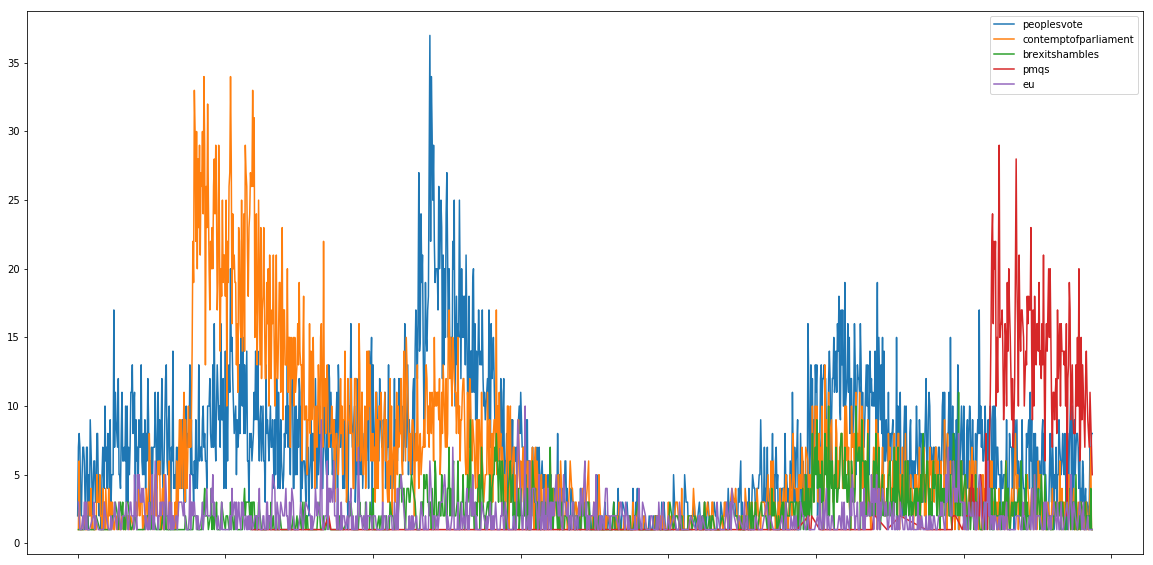

In [13]:
ht = [x for x, c in counters["hashtags"].most_common(6)][1:]
p = plot_hashtag_trends(raw_data, ht)
p.plot(figsize=(20,10))

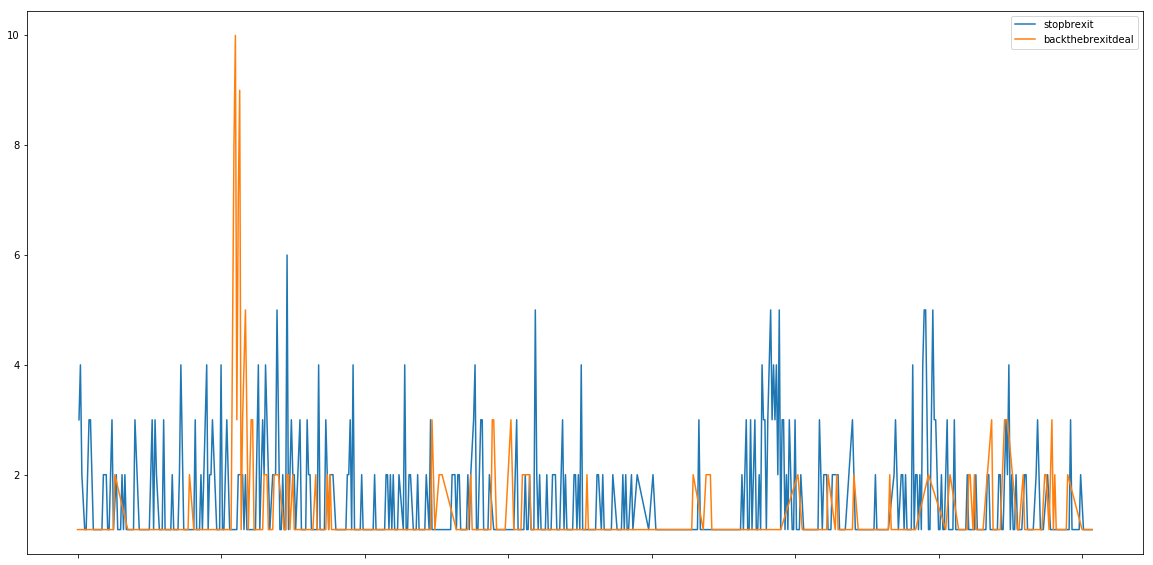

In [14]:
p = plot_hashtag_trends(raw_data, ["stopbrexit", "backthebrexitdeal"])
p.plot(figsize=(20,10))

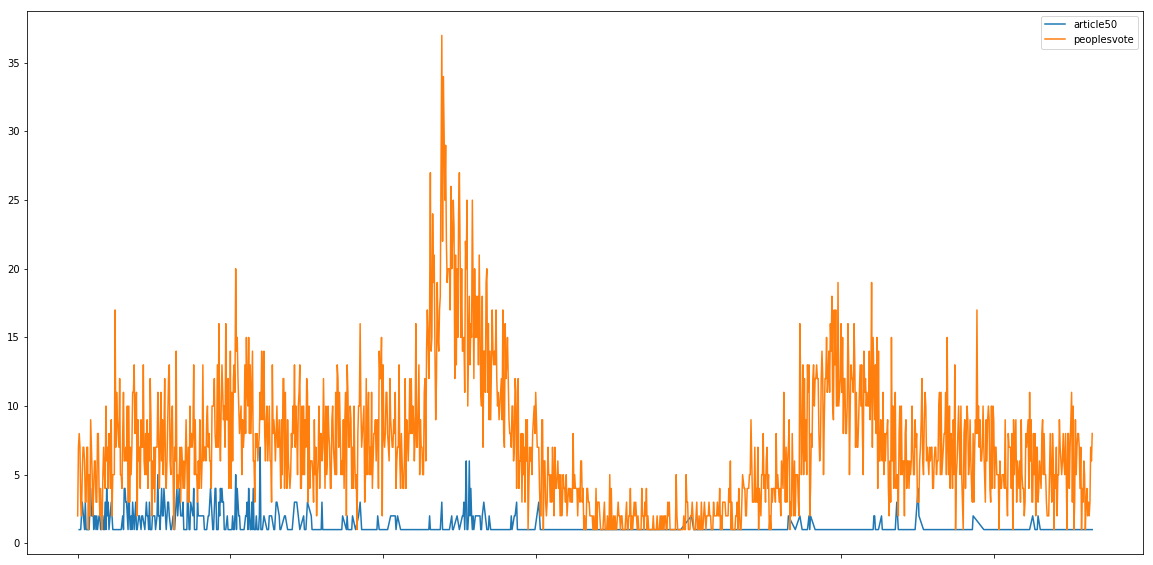

In [19]:
p = plot_hashtag_trends(raw_data, ["article50", "peoplesvote"])
p.plot(figsize=(20,10))

In [ ]:
u = [x for x, c in counters["users"].most_common(5)]
p = plot_user_trends(raw_data, u)
p.plot(figsize=(20,10))

In [ ]:
u = [x for x, c in counters["urls"].most_common(5)]
p = plot_url_trends(raw_data, u)
p.plot(figsize=(20,10))

In [ ]:
u = [x for x, c in counters["urls"].most_common(5)]
users = match_users_for_urls(raw_data, u)
save_json("data/users_for_urls.json", users)
print("Done")

In [ ]:
h = [x for x, c in counters["hashtags"].most_common(6)[1:]]
users = match_users_for_hashtags(raw_data, h)
save_json("data/users_for_hashtags.json", users)
print("Done")

In [ ]:
p = print_hashtag_trends(raw_data, ["franceprotests", "leavemeansleave"])
p.plot(figsize=(20,10))

In [ ]:
franceprotests = match_users_for_hashtags(raw_data, ["franceprotests"])
save_json("data/franceprotests.json", franceprotests)
print("Done")

In [ ]:
lml = match_users_for_hashtags(raw_data, ["leavemeansleave"])
save_json("data/leavemeansleave.json", lml)
print("Done")

In [ ]:
fpu = [x for x, c in franceprotests["franceprotests"].items()]
lmlu = [x for x, c in lml["leavemeansleave"].items()]
inter = list(set(fpu).intersection(set(lmlu)))
print(len(inter))

In [ ]:
lml_graph = match_graph(interactions, lmlu)
save_csv(lml_graph, "data/lml_graph.csv")
print("Done")

In [ ]:
lml_hashtags = get_hashtags_for_users(raw_data, lmlu)
lmlht = dict(lml_hashtags.most_common(20))
lmldf = pd.Series(lmlht)
lmldf.plot(kind='bar', figsize=(20,10))

In [ ]:
fpusers = [x for x, c in franceprotests["franceprotests"].items()]
fp_graph = match_graph(interactions, fpusers)
save_csv(fp_graph, "data/fp_graph.csv")
print("Done")

In [ ]:
fp_graph2 = match_graph2(interactions, fpusers)
save_csv(fp_graph2, "data/fp_graph2.csv")
print("Done")

In [ ]:
fp_tweets = get_tweets_by_user(raw_data, fpusers)
save_json("data/franceprotests_tweets.json", fp_tweets)
print("Done")

In [ ]:
p = plot_user_activity(raw_data, fpusers)
p.plot(figsize=(20,10))

In [ ]:
fp_hashtags = get_hashtags_for_users(raw_data, fpusers)
fphtc = dict(fp_hashtags.most_common(20))
df = pd.Series(fphtc)
df.plot(kind='bar', figsize=(20,10))

In [ ]:
steph_retweeted = get_retweeted_from_sn_list(raw_data, ["stephphilip8"])
print(steph_retweeted)

In [ ]:
retweeted_steph = get_retweeters_of_sn_list(raw_data, ["stephphilip8"])
p = plot_user_activity(raw_data, [x for x, c in retweeted_steph.most_common()])
p.plot(figsize=(20,10))

In [ ]:
retweeted_lvnancy = get_retweeters_of_sn_list(raw_data, ["LVNancy"])
p = plot_user_activity(raw_data, [x for x, c in retweeted_lvnancy.most_common()])
p.plot(figsize=(20,10))